In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Source of data: [Marketing Campaign](https://www.kaggle.com/rodsaldanha/arketing-campaign)**


## **Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Reading the dataset**

In [ ]:
customer = pd.read_csv("/content/drive/MyDrive/marketing_campaign (1).csv",header=0, sep='\t')
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# **Checking missing values**

In [ ]:
missing_count = customer.isnull().sum()
missing_count

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# **Dropping rows with null values**

In [ ]:
customer=customer.dropna(axis=0)
customer = customer.drop(['Z_CostContact','Z_Revenue'],axis=1)
customer.shape

(2216, 27)

# **Adding new coulmns**

In [ ]:
customer["Age"] = 2021-customer['Year_Birth']
customer['total_spend']=customer['MntWines']+customer['MntFruits']+customer['MntMeatProducts']+customer['MntFishProducts']+customer['MntSweetProducts']+customer['MntGoldProds']

customer['joining_date']=pd.to_datetime(customer['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
customer["total_children"]=customer["Kidhome"]+customer["Teenhome"]

In [ ]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,total_spend,joining_date,total_children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,1617,2012-09-04,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,27,2014-03-08,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,776,2013-08-21,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,53,2014-02-10,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,422,2014-01-19,1


# **People who accepted the first campaign offer based on marital status**

**Crosstabulation**

In [ ]:
pd.crosstab(index= customer['AcceptedCmp1'] , columns=customer['Marital_Status'])

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
AcceptedCmp1,,,,,,,,
0,1,3,220,795,441,541,71,2
1,1,0,12,62,30,32,5,0


# **Which type of customers are biggest buyers**

**Using Groupby**

In [ ]:
customer.groupby("Education").total_spend.sum()

Education
2n Cycle       98986
Basic           4417
Graduation    693802
Master        222565
PhD           325509
Name: total_spend, dtype: int64

# **Graduates are the biggest buyers, where are the customers spending their money on?**

**Pie chart using matplotlib**

findfont: Font family [' DejaVu Sans'] not found. Falling back to DejaVu Sans.


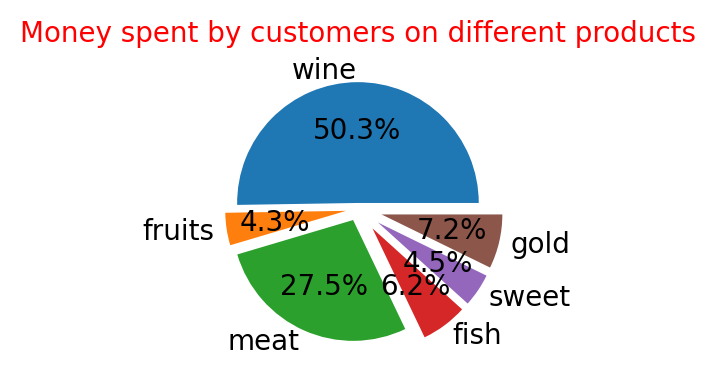

In [ ]:
x1=customer.MntWines.sum()
x2=customer.MntFruits.sum()
x3=customer.MntMeatProducts.sum()
x4=customer.MntFishProducts.sum()
x5=customer.MntSweetProducts.sum()
x6=customer.MntGoldProds.sum()

labels=["wine","fruits","meat","fish","sweet","gold"]
values=[x1,x2,x3,x4,x5,x6]
explode=[0.05,0.1,0.1,0.2,0.2,0.2]
plt.figure(figsize=(4,2),dpi=200)
plt.pie(values,labels=labels,autopct="%.1f%%",explode=explode)
plt.title("Money spent by customers on different products",color="r",fontdict={'fontname':' DejaVu Sans','fontsize':10})
plt.show()

# **Average basket size based on education level**

**Groupby and aggregate**

In [ ]:
data2=customer.groupby(['Education']).total_spend.agg([len, sum, max])
data2["average_basket"] = data2["sum"] / data2["len"]
data2=data2.reset_index()
data2

,Education,len,sum,max,average_basket
0,2n Cycle,200,98986,2257,494.930000
1,Basic,54,4417,839,81.796296
2,Graduation,1116,693802,2524,621.686380
3,Master,365,222565,2525,609.767123
4,PhD,481,325509,2440,676.733888


## **Average basket size visualization using matplotlib and setting hatch**

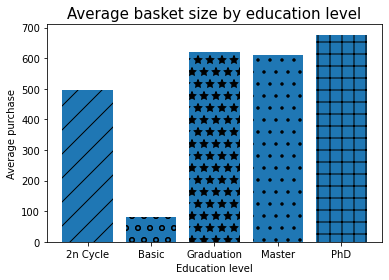

In [ ]:
bars=plt.bar(data2.Education,data2.average_basket)
bars[0].set_hatch('/')
bars[1].set_hatch("o")
bars[2].set_hatch("*")
bars[3].set_hatch(".")
bars[4].set_hatch("+")
plt.xlabel("Education level")
plt.ylabel("Average purchase")


plt.title("Average basket size by education level",fontdict={'fontsize':15})
plt.show()

# **Biggest customers for wine**

In [ ]:
data3=customer.groupby(['Education']).MntWines.agg([len, sum, max])
data3=data3.reset_index()
sum_list = data3["sum"].tolist()
Education_list = data3["Education"].tolist()

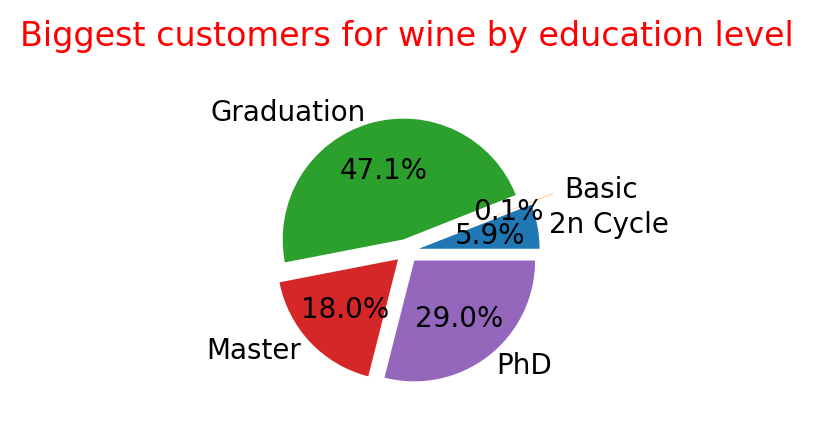

In [ ]:
explode=[0.1,0.3,0.1,0.1,0.1]
plt.figure(figsize=(4,2),dpi=200)
plt.title("Biggest customers for wine by education level\n",color='r')
plt.pie(sum_list,labels=Education_list,autopct="%.1f%%",explode=explode)
plt.show()

# **Average income of top 20% wine consumers**

**Using sort and loc function**

In [ ]:
data4=customer.loc[:,["MntWines","Income","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]]
sorted_data4 = data4.sort_values(by=['MntWines'],ascending=False)
top_20 = data4.Income.count() // 5
sorted_data4.loc[:top_20,"Income"].mean()

56111.60828526481

# **What top 20% wine consumers buy apart from wine**

In [ ]:
sorted_data4.loc[:top_20,["Income","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]]

,Income,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
1749,80360.0,86,454,112,43,43
824,87771.0,38,287,50,57,33
559,87771.0,38,287,50,57,33
2098,81929.0,55,278,49,0,185
917,84169.0,19,403,0,19,0
...,...,...,...,...,...,...
377,30279.0,4,14,4,4,1
269,22070.0,7,19,8,2,21
1546,30390.0,12,12,25,1,20
1391,22682.0,14,29,4,2,36


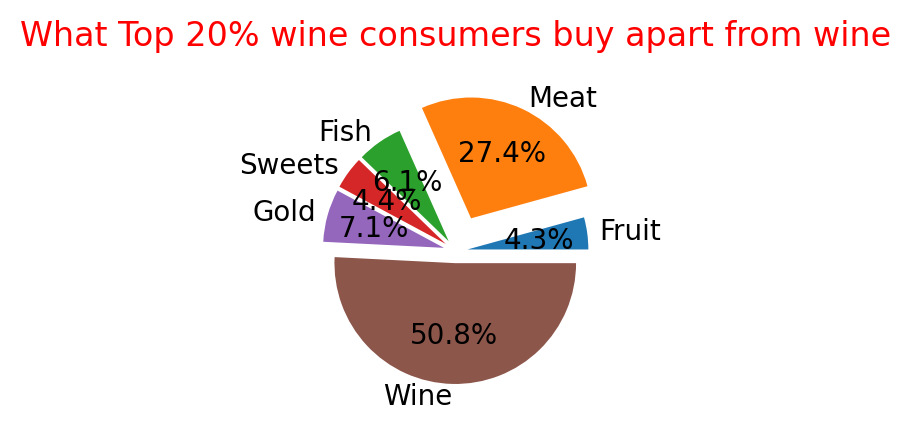

In [ ]:
AvgFruit=sorted_data4.loc[:top_20,"MntFruits"].mean()
AvgMeat=sorted_data4.loc[:top_20,"MntMeatProducts"].mean()
AvgFish=sorted_data4.loc[:top_20,"MntFishProducts"].mean()
AvgSweet=sorted_data4.loc[:top_20,"MntSweetProducts"].mean()
AvgGold=sorted_data4.loc[:top_20,"MntGoldProds"].mean()
AvgWine=sorted_data4.loc[:top_20,"MntWines"].mean()
Avrg=[AvgFruit,AvgMeat,AvgFish,AvgSweet,AvgGold,AvgWine]
Products=["Fruit","Meat","Fish","Sweets","Gold","Wine"]
explode=[0.1,0.3,0.1,0.1,0.1,0.1]
plt.figure(figsize=(4,2),dpi=200)
plt.title("What Top 20% wine consumers buy apart from wine\n",color='r')
plt.pie(Avrg,labels=Products,autopct="%.1f%%",explode=explode)
plt.show()

## **Predicting the 'response'(will be the dependent variable) based on certain independent variables using Logistic Regression**

In [ ]:
var = ['NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']
X = customer[var]
Y = customer.Response

## **Splitting the data into training and testing datasets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

 **Creating the logistic regression model using train set and predicting the response of test set**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train)


Y_pred=logreg.predict(X_test)

**Obtaining the Confusion matrix to know the true positive and false positive rate.
This can also help in knowing the accuracy, specificity and precision of the model created**

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[462,   5],
       [ 68,  19]])

## **Heatmap for better visualization of confusion matrix**

Text(0.5, 257.44, 'Predicted label')

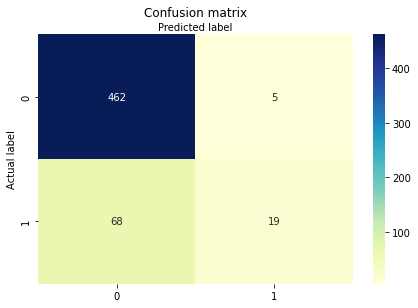

In [ ]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **Calculating the accuracy (Accuracy = (TP+TN)/(TP+TN+FP+FN))**

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_test, Y_pred))

Accuracy :  0.868231046931408


In [ ]:
from sklearn.metrics import classification_report
predictions = logreg.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       467
           1       0.79      0.22      0.34        87

    accuracy                           0.87       554
   macro avg       0.83      0.60      0.63       554
weighted avg       0.86      0.87      0.84       554



## **Creating the heatmap to know the correlation between the different features of the dataset. This will help in better feature selection.**

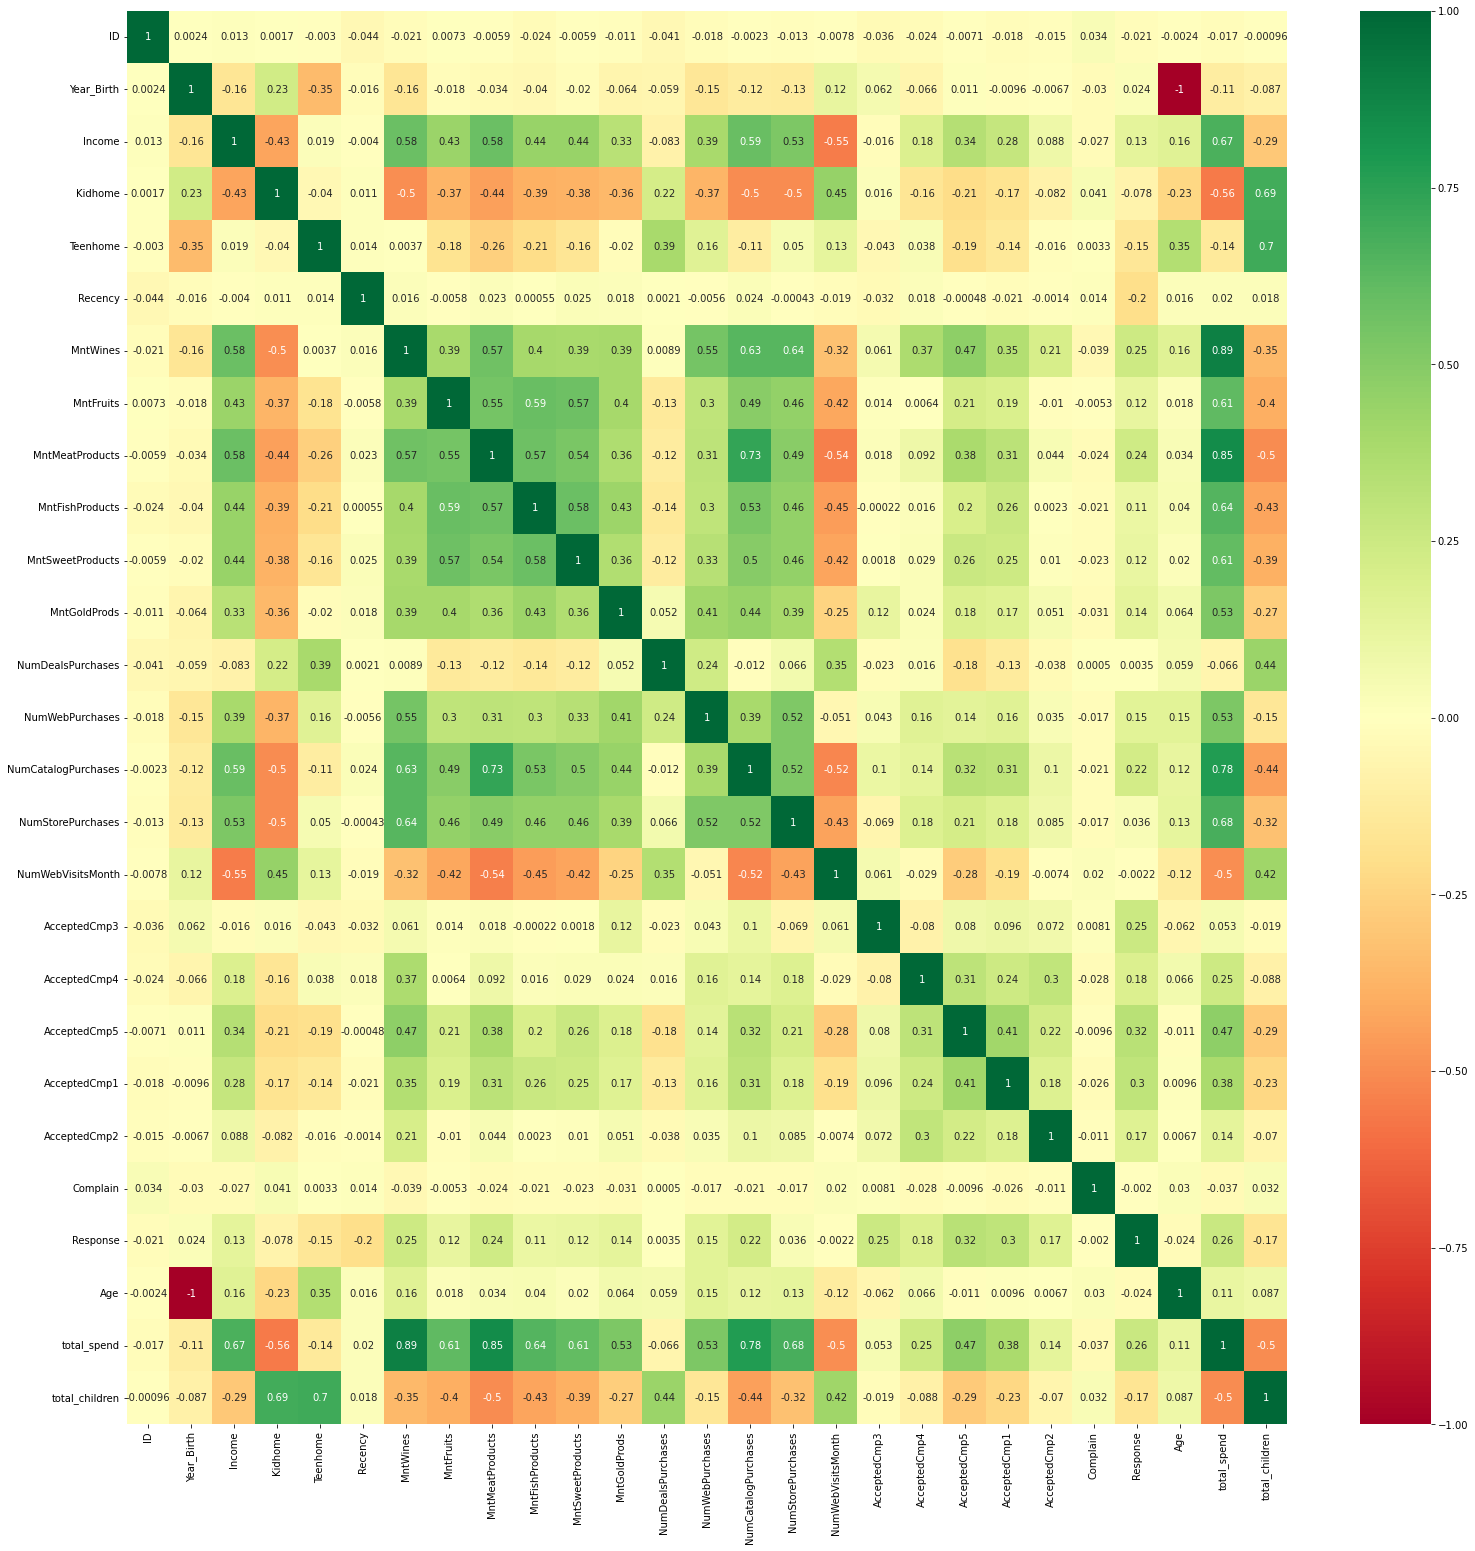

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
X = customer.iloc[:,0:26]  #independent columns
y = customer.iloc[:,-1]    #target column i.e response
#get correlations of each features in dataset
corrmat = customer.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(26,26))
#plot heat map
g=sns.heatmap(customer[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **Thank You !**